<a href="https://colab.research.google.com/github/xiaoxuan716/Python_review/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   如何join dataframe
2.   Seaborn 一般和matplotlib (plt)一起工作：用plt.figure(figsize=(14, 6)）& plt.title('来setteing')；

用sns作图；作图前需要先筛选数据 + 转成DF + sort_values + reset_index()


2.   如何使用seaborn
- 用groupby后记得reset_index()
3.   \可以代表换行 中间可以有很多空格
4.   https://www.esensoft.com/industry-news/data-visualization-803.html



**可视化 Visulisation**

可视化是通过视觉表示传递信息。
它既是一门艺术（需要美学感），又是一门多学科的科学（需要统计知识，计算机科学等）。
当前的挑战之一是我们如何表现包含在海量数据中的信息，这些数据太大而无法被人类吸收。
此信息永远不能以表格格式（例如，PrettyTable等）完整显示。 相反，我们希望以一种格式来呈现数据，该格式将使我们能够看到数据集中包含的“模式”。

# La librairie `seaborn`

La librairie `seaborn` est une des librairies disponibles en Python pour la visualisation de données. Cette librairie fonctionne particulièrement bien avec la librairie `pandas`. Cette librairie est décrite sur le site web suivant :  __[https://seaborn.pydata.org/](https://seaborn.pydata.org/)__.

On notera en particulier les sections suivantes :

- __[Gallery](https://seaborn.pydata.org/examples/index.html)__ : permet de rapidement voir les possibilités de visualisation offertes par la librairie `seaborn`. On montre en particulier, les visualisations les plus complexes qu'il est possible de réaliser.
- __[Tutorial](https://seaborn.pydata.org/tutorial.html)__ : permet de rapidement trouver comment utiliser la librairie pour des objectifs de visualisation spécifiques.
- __[API Reference](https://seaborn.pydata.org/api.html)__ : documentation détaillée (mais pas très *User friendly* des fonctions de visualisation fournies par la librairie.

## Choisir le type de graphique
La librairie `seaborn` offre un grand nombre de visualisations standards. Plusieurs de ces visualisations sont en fait des spécialisations de visualisations plus génériques. Ainsi, on retrouve les grands types suivants :

- Graphiques de relations $(x,y)$ : ces graphiques sont construits avec la fonction `relplot()` en spécifiant le type de graphique à utiliser (paramètre `kind`) ou en utilisant la fonction spécialisée correspondante. Par exemple :

    - `relplot(kind='scatter', ...)` ou `**scatterplot(...)**` produisent des graphiques en nuage de points (*scatter plots*);
    - `relplot(kind='line', ...)` ou `lineplot(...)` produisent des graphiques en lignes.

- Graphiques de catégories : ces graphiques sont construits avec la fonction `catplot()` en spécifiant le type de graphique à utiliser (paramètre `kind`) ou en utilisant la fonction spécialisée correspondante. Par exemple :

    - `catplot(kind='box', ...)` ou `**boxplot()**` produisent des graphiques de boîtes à moustache (*box and wiskers*);
    - `catplot(kind='bar', ...)` ou `**barplot()**` produisent des graphiques à bande (*bar*)
    - `catplot(kind='count', ...)` ou `**countplot()**` produisent des histogrammes pour déterminer la fréquence des valeurs de la colonne sélectionnée.

### La source de donnees : DataFrame 

### Les 3 dimensions de base : 

- x: 包含X轴数据的DataFrame的列的名称。对于关系图，此参数是图的坐标。对于类别图表，这是包含要使用类别的变量。
- y:包含y轴数据的DataFrame列的名称。
- hue: 表示用于数据着色的列。它指示图中显示的不同数据系列。

### Les deux dimensions supplémentaires
Il est aussi possible d'ajouter deux autres dimensions aux graphiques. “ seaborn”会将数据显示为图形网格。我们通过指示行（“ row”参数）和列（“ col”参数）来控制此网格的显示。

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import files
import io 
uploaded = files.upload()
df_product = pd.read_csv('product_list.csv')
uploaded = files.upload()
df_sales= pd.read_csv("sales_data.csv")


Saving product_list.csv to product_list (2).csv


Saving sales_data.csv to sales_data (1).csv


In [43]:
df_sales.head()
df_full=df_sales.join(df_product.set_index("product_id"),on="product_id")
df_full.head()

,salesorder_id,salesorderdetail_id,product_id,quantity,sales_date,product_name,unit_price
0,1,1,2,10,2019-09-28 10:00:00,Mars,1.05
1,2,2,3,12,2019-09-29 12:00:00,Kit Kat,1.25
2,3,3,4,15,2019-09-25 14:00:00,Bounty,1.50
3,4,4,1,16,2019-09-26 18:00:00,Twix,0.99
4,3,5,1,17,2019-09-27 19:00:00,Twix,0.99


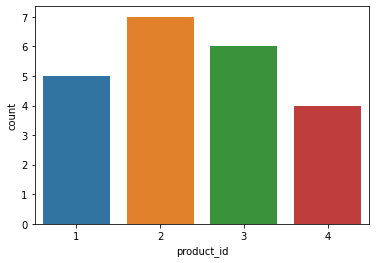

In [16]:
# on voudra afficher le nombre de fois qu'un produit (identifié par son product_id) a été commandé.
sns.countplot(x="product_id",data=df_full)

[Text(0, 0.5, 'Nombre des produits'),
 Text(0.5, 0, 'Nom du produit'),
 Text(0.5, 1.0, 'Nombre de fois un produit a été commandé.')]

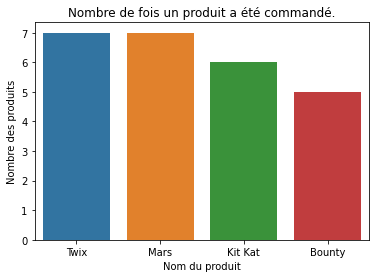

In [20]:
# on voudra afficher le nombre de fois qu'un produit name) a été commandé.
sns.countplot(x="product_name",data=df_full)

# 我们还可以指名 顺序
sns.countplot(x="product_name",data=df_full,order=['Twix','Mars','Kit Kat','Bounty'])

# 加入 Title 和 X Ｙ轴ｎａｍｅ
sns.countplot(x='product_name', data=df_full, order=['Twix','Mars','Kit Kat','Bounty']).set(xlabel='Nom du produit', ylabel='Nombre des produits', title='Nombre de fois un produit a été commandé.')

#seaborn.catplot(kind='count', x='product_name', data=df_sales_full, order=['Twix','Mars','Kit Kat','Bounty']). \  # (\可以代表换行 中间可以有很多空格)
#   set(xlabel='Nom du produit', ylabel='Nombre des produits', title='Nombre de fois un produit a été commandé.')

 si on désire le nombre total d'unités commandées _par produit_
 
 ==》 先groupby 计算

 ==》 使用 **reset_index()** pour s'assurer que l'index soit traité comme une colonne.

==》 或者不提前设置reset_index,这样可以横向作图 ： sns.barplot(y=agg_units.index, x=agg_units["UNITS"], color = 'grey')
写paramete时直接加上 df.index  

 ** 很重要 不然无法做图 **texte en gras**

In [88]:
df1=pd.DataFrame(df_full.groupby("product_id").quantity.sum()).reset_index()
df1.sort_values(by='quantity', ascending=False, inplace=True)
df1["product_id"]=df1["product_id"].apply(str)
# 将int转换成str
df1.dtypes

product_id    object
quantity       int64
dtype: object

**Sort values 可以从小到大 数值 顺序作图**

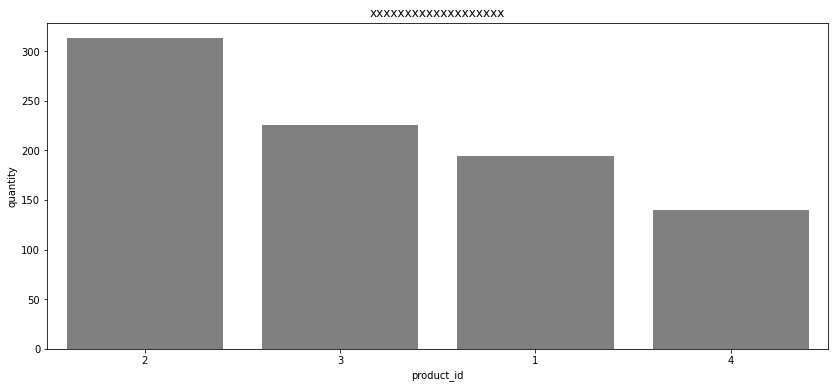

In [89]:
import matplotlib.pyplot as plt
#sns.catplot(kind='bar',x='product_id', y='quantity', data=df1)
plt.figure(figsize=(14, 6))
plt.title('xxxxxxxxxxxxxxxxxxx')
sns.barplot(x=df1["product_id"], y=df1["quantity"], color = 'grey')

df.dt.month/year/day ==> 可以提取日期 

但需要其dtype为Date


In [64]:
df_full.dtypes
df_full['sales_date'] = pd.to_datetime(df_full['sales_date'], errors='coerce')
df_full.dtypes


df_full["sales_day"] = df_full["sales_date"].dt.day

df_sales_by_date = df_full.groupby(["sales_day","product_id"])[["quantity"]].sum()
df_sales_by_date = df_sales_by_date.reset_index()

df_sales_by_date


,sales_day,product_id,quantity
0,22,2,90
1,23,2,67
2,24,1,4
3,25,1,134
4,25,2,76
5,25,4,15
6,26,1,39
7,26,2,25
8,26,3,87
9,27,1,17


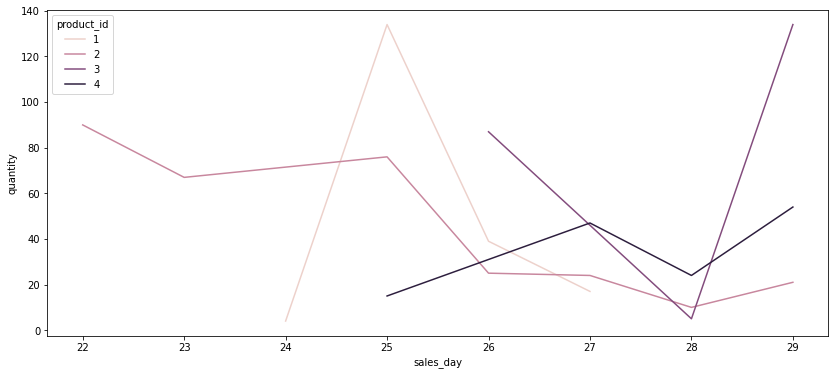

In [66]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='sales_day', y='quantity', hue='product_id', data=df_sales_by_date)

与其在同一张图表中使用颜色（使用hue参数）来代表它们，我们不为每种产品创建一张图表并对其进行堆叠（使用row/col参数）。

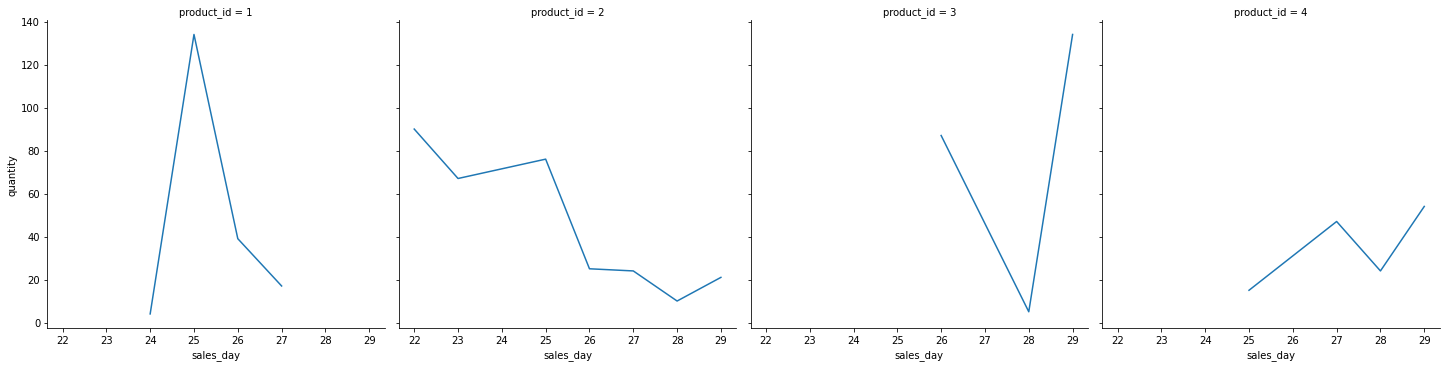

In [91]:
# seaborn.relplot(kind='line', x='sales_day', y='quantity', row='product_id', data=df_sales_by_date)
sns.relplot(kind='line', x='sales_day', y='quantity', col='product_id', data=df_sales_by_date)

为了限制 每行有几幅图，可以用col_wrap

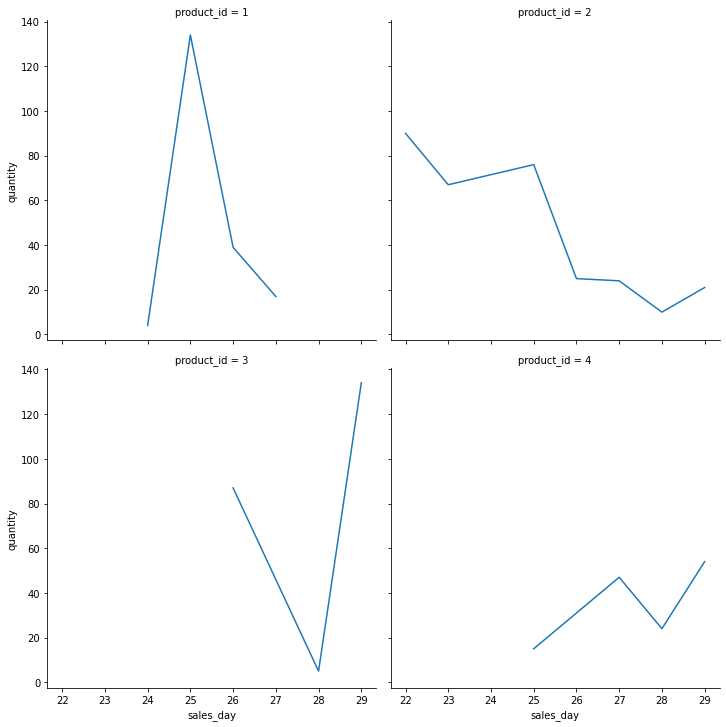

In [93]:
sns.relplot(kind='line', x='sales_day', y='quantity', col='product_id', col_wrap=2, data=df_sales_by_date)